### Statistics and Data Analysis Level - 2
### Submitted by VINAY.M (Date of Submission 03-September-2023)

Scrape the data from Flipkart website and perform EDA: 
- Select a website / webpage
- Using beautifulsoup Perform web scraping
- Store the data in a pandas dataframe
- Extract features in separate columns
- Take care of data types, convert numerical data types to int or float
- Check for duplicates and handle them
- Check for missing values and use appropriate technique to impute the missing values
- Perform univariate analysis using suitable plots / charts
- Perform bi-variate analysis using suitable plots / charts
- Show patterns not only between independent and dependent features but also within independent features
- Mention your observations in markdown cells below a visualization

Page link:  https://www.flipkart.com/search?q=phone&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off

In [1]:
#importing libraries for scraping and EDA
from bs4 import BeautifulSoup
import requests
import urllib
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
#Test URL for Scraping
url = 'https://www.flipkart.com/search?q=phone&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off'

In [3]:
#Seding URL request to fetch the content from the weblink
result = requests.get(url)

In [4]:
#Response status Check
result

<Response [200]>

In [5]:
#Extracting the sourcecode of the webpage  
content = result.text

In [6]:
#Creating a soup for the scraping
soup = BeautifulSoup(content,'lxml')

In [7]:
#print(soup.prettify())

In [8]:
#Sample testing of the pagination
pagenumbers = soup.find("a", class_= "_1LKTO3").get("href")
print(pagenumbers)

/search?q=phone&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=2


In [9]:
#Extract total pages in flipkart Query page
def totalpages():
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')

    # Find the element that contains the total number of pages
    page_info = soup.find('div', {'class': '_2MImiq'})
    page_text = page_info.span.text

    # Extract the total number of pages
    total_pages = int(page_text.split()[-1])

    return total_pages

In [10]:
#storing total pages in the query page
total_pages_to_scrap = totalpages()

In [11]:
#Displaying total pages
total_pages_to_scrap

371

In [12]:
#Extraction of Mobile name detials
Mobile_Name=soup.find_all('div',class_="_4rR01T")

In [13]:
#Sample checking
Mobile_Name

[<div class="_4rR01T">Infinix HOT 20 Play (Aurora Green, 64 GB)</div>,
 <div class="_4rR01T">Infinix HOT 20 Play (Racing Black, 64 GB)</div>,
 <div class="_4rR01T">Infinix HOT 20 Play (Luna Blue, 64 GB)</div>,
 <div class="_4rR01T">POCO M6 Pro 5G (Power Black, 128 GB)</div>,
 <div class="_4rR01T">POCO C51 (Power Black, 64 GB)</div>,
 <div class="_4rR01T">POCO C51 (Royal Blue, 64 GB)</div>,
 <div class="_4rR01T">REDMI 12 (Moonstone Silver, 128 GB)</div>,
 <div class="_4rR01T">POCO C50 (Royal Blue, 32 GB)</div>,
 <div class="_4rR01T">POCO C55 (Cool Blue, 128 GB)</div>,
 <div class="_4rR01T">Infinix HOT 20 Play (Fantasy Purple, 64 GB)</div>,
 <div class="_4rR01T">realme 11x 5G (Purple Dawn, 128 GB)</div>,
 <div class="_4rR01T">realme 11x 5G (Midnight Black, 128 GB)</div>,
 <div class="_4rR01T">POCO C55 (Power Black, 128 GB)</div>,
 <div class="_4rR01T">realme 11x 5G (Midnight Black, 128 GB)</div>,
 <div class="_4rR01T">realme 11x 5G (Purple Dawn, 128 GB)</div>,
 <div class="_4rR01T">POCO 

In [14]:
#Sample slicing and checking
Mobile_Name[0].text

'Infinix HOT 20 Play (Aurora Green, 64 GB)'

In [15]:
#Mobile price extraction
Mobile_Price = soup.find_all('div',class_="_30jeq3 _1_WHN1")

In [16]:
#Mobile price checking
Mobile_Price

[<div class="_30jeq3 _1_WHN1">₹7,999</div>,
 <div class="_30jeq3 _1_WHN1">₹7,999</div>,
 <div class="_30jeq3 _1_WHN1">₹7,999</div>,
 <div class="_30jeq3 _1_WHN1">₹12,999</div>,
 <div class="_30jeq3 _1_WHN1">₹6,499</div>,
 <div class="_30jeq3 _1_WHN1">₹6,499</div>,
 <div class="_30jeq3 _1_WHN1">₹9,999</div>,
 <div class="_30jeq3 _1_WHN1">₹5,499</div>,
 <div class="_30jeq3 _1_WHN1">₹8,499</div>,
 <div class="_30jeq3 _1_WHN1">₹7,999</div>,
 <div class="_30jeq3 _1_WHN1">₹15,999</div>,
 <div class="_30jeq3 _1_WHN1">₹15,999</div>,
 <div class="_30jeq3 _1_WHN1">₹8,499</div>,
 <div class="_30jeq3 _1_WHN1">₹14,999</div>,
 <div class="_30jeq3 _1_WHN1">₹14,999</div>,
 <div class="_30jeq3 _1_WHN1">₹10,999</div>,
 <div class="_30jeq3 _1_WHN1">₹8,499</div>,
 <div class="_30jeq3 _1_WHN1">₹7,299</div>,
 <div class="_30jeq3 _1_WHN1">₹9,999</div>,
 <div class="_30jeq3 _1_WHN1">₹17,675</div>,
 <div class="_30jeq3 _1_WHN1">₹6,999</div>,
 <div class="_30jeq3 _1_WHN1">₹6,999</div>,
 <div class="_30jeq3 _1_W

In [17]:
#Mobile Rating Extraction
Mobile_Rating_Stars = soup.find_all('div',class_="_3LWZlK")

In [18]:
#Checking the scrape response
Mobile_Rating_Stars

[<div class="_3LWZlK">4.3</div>,
 <div class="_3LWZlK">4.3</div>,
 <div class="_3LWZlK">4.3</div>,
 <div class="_3LWZlK">4.3</div>,
 <div class="_3LWZlK">4.1</div>,
 <div class="_3LWZlK">4.1</div>,
 <div class="_3LWZlK">4.2</div>,
 <div class="_3LWZlK">4.2</div>,
 <div class="_3LWZlK">4.1</div>,
 <div class="_3LWZlK">4.3</div>,
 <div class="_3LWZlK">4.5</div>,
 <div class="_3LWZlK">4.5</div>,
 <div class="_3LWZlK">4.1</div>,
 <div class="_3LWZlK">4.5</div>,
 <div class="_3LWZlK">4.5</div>,
 <div class="_3LWZlK">4.5</div>,
 <div class="_3LWZlK">4.1</div>,
 <div class="_3LWZlK">4</div>,
 <div class="_3LWZlK">4.2</div>,
 <div class="_3LWZlK">4.4</div>,
 <div class="_3LWZlK">4.3</div>,
 <div class="_3LWZlK">4.3</div>,
 <div class="_3LWZlK">4</div>,
 <div class="_3LWZlK">4.5</div>,
 <div class="_3LWZlK">4.2</div>,
 <div class="_3LWZlK _1BLPMq">4</div>,
 <div class="_3LWZlK _1BLPMq">3</div>,
 <div class="_3LWZlK">4.5</div>,
 <div class="_3LWZlK _1BLPMq">4</div>,
 <div class="_3LWZlK _1BLPMq"

In [19]:
#Data Drilling for for the ratings
Mobile_Rating_Stars[0].text

'4.3'

In [20]:
#Mobile Specificaiton scraping 
Mobile_Spec = soup.find_all('ul',class_="_1xgFaf")

In [21]:
#Testing the outcome of scrape
Mobile_Spec[0].text

'4 GB RAM | 64 GB ROM | Expandable Upto 256 GB17.32 cm (6.82 inch) HD+ Display13Mp + AI Lens | 8MP Front Camera6000 mAh Li-ion Polymer BatteryMediaTek G37 Processor1 Year on Handset and 6 Months on Accessories'

In [22]:
#Extracting the Image URL
img_element = soup.find_all('img', class_="_396cs4")

In [23]:
#Image URL Test
img_element[0]["src"]

'https://rukminim2.flixcart.com/image/312/312/xif0q/mobile/s/b/e/-original-imagkgrxdzzjuguw.jpeg?q=70'

In [24]:
#Creating Necessary Columns
mobile_spec_columns = pd.DataFrame(columns=['Mobile_Name', 'Mobile_Price', 'Mobile_Rating_Stars', 'Mobile_Spec', 'img_element'])

In [25]:
#Empty Frame is created for further scraping
mobile_spec_columns

,Mobile_Name,Mobile_Price,Mobile_Rating_Stars,Mobile_Spec,img_element


In [26]:
#Testing of scraping for the single page

total_mobiles_inPage = len(Mobile_Name) #Identification of Number of Mobiles in page
mobile_spec_data = []  # List to store the dictionaries representing each row of data

#iterating soup and storing the output in the form for dictionaries 
for i in range(0, total_mobiles_inPage): 
    mobile_spec_data.append(
        {
            'Mobile_Name': Mobile_Name[i].text,
            'Mobile_Price': Mobile_Price[i].text,
            'Mobile_Rating_Stars': Mobile_Rating_Stars[i].text,
            'Mobile_Spec': Mobile_Spec[i].text,
            'img_element': img_element[i]["src"]
        }
    )

# Create DataFrame from the list of dictionaries
mobile_spec_columns = pd.DataFrame(mobile_spec_data) 

# Display the resulting DataFrame
print(mobile_spec_columns)

                                      Mobile_Name Mobile_Price  \
0       Infinix HOT 20 Play (Aurora Green, 64 GB)       ₹7,999   
1       Infinix HOT 20 Play (Racing Black, 64 GB)       ₹7,999   
2          Infinix HOT 20 Play (Luna Blue, 64 GB)       ₹7,999   
3            POCO M6 Pro 5G (Power Black, 128 GB)      ₹12,999   
4                   POCO C51 (Power Black, 64 GB)       ₹6,499   
5                    POCO C51 (Royal Blue, 64 GB)       ₹6,499   
6             REDMI 12 (Moonstone Silver, 128 GB)       ₹9,999   
7                    POCO C50 (Royal Blue, 32 GB)       ₹5,499   
8                    POCO C55 (Cool Blue, 128 GB)       ₹8,499   
9     Infinix HOT 20 Play (Fantasy Purple, 64 GB)       ₹7,999   
10            realme 11x 5G (Purple Dawn, 128 GB)      ₹15,999   
11         realme 11x 5G (Midnight Black, 128 GB)      ₹15,999   
12                 POCO C55 (Power Black, 128 GB)       ₹8,499   
13         realme 11x 5G (Midnight Black, 128 GB)      ₹14,999   
14        

## Bundelling all codes to scrape entire flipkart query pages

In [27]:
#All modules
from bs4 import BeautifulSoup
import requests
import urllib
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import pandas as pd
import numpy as np

In [28]:
#Test URL
url = 'https://www.flipkart.com/search?q=phone&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off'

In [29]:
#sending requests
result = requests.get(url)
result

<Response [200]>

In [30]:
#storing source code
content = result.text

In [31]:
#creating soup for scraping
soup = BeautifulSoup(content,'lxml')

In [32]:
#Extract total pages in flipkart
def totalpages():
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')

    # Find the element that contains the total number of pages
    page_info = soup.find('div', {'class': '_2MImiq'})
    page_text = page_info.span.text

    # Extract the total number of pages
    total_pages = int(page_text.split()[-1])

    return total_pages

In [33]:
#List of pages in Query URL
total_pages_to_scrap = totalpages()
print(f"Total Pages in Flipkart Link is {total_pages_to_scrap}")

Total Pages in Flipkart Link is 371


In [34]:
#Creating unique link for all the pages for iteration
total_links = []
for i in range(1,total_pages_to_scrap+1):
    tempUrl = f'https://www.flipkart.com/search?q=phone&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page={i}'
    total_links.append(tempUrl)

In [35]:
#All URL at query to scrape
total_links

['https://www.flipkart.com/search?q=phone&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=1',
 'https://www.flipkart.com/search?q=phone&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=2',
 'https://www.flipkart.com/search?q=phone&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=3',
 'https://www.flipkart.com/search?q=phone&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=4',
 'https://www.flipkart.com/search?q=phone&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=5',
 'https://www.flipkart.com/search?q=phone&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=6',
 'https://www.flipkart.com/search?q=phone&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=7',
 'https://www.flipkart.com/search?q=phone&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page=8',
 'https://www.fl

In [36]:
#Automating the previously writting code for the all the weblinks
#Empty DataFrame for Storing the scraped data
mobile_spec_columns = pd.DataFrame(columns=['Mobile_Name', 'Mobile_Price', 'Mobile_Rating_Stars', 'Mobile_Spec', 'img_element'])

#Temp variable for storing the scraping output in the form of dictionary and to append series of data from multiple pages
temp = []

#Ierating the each page link for scraping
for eachlink in total_links:
    try:
        url = f'{eachlink}' #Passing each link at once
        result = requests.get(url) # each link request sent for the flipkart server
        content = result.text #Storing link source code 
        soup = BeautifulSoup(content,'lxml') #Creting soup for individual link at each iteration
        
        Mobile_Name=soup.find_all('div',class_="_4rR01T") #Mobile Name is extracted at first page and repeats same until the completion of all URL
        Mobile_Price = soup.find_all('div',class_="_30jeq3 _1_WHN1") #Mobile Price is extracted at first page and repeats same until the completion of all URL
        Mobile_Rating_Stars = soup.find_all('div',class_="_3LWZlK") #Mobile Ratings is extracted at first page and repeats same until the completion of all URL
        Mobile_Spec = soup.find_all('ul',class_="_1xgFaf") #Mobile Specifications is extracted at first page and repeats same until the completion of all URL
        img_element = soup.find_all('img', class_="_396cs4") #Mobile Image is extracted at first page and repeats same until the completion of all URL
        
        total_mobiles_inPage = len(Mobile_Name) #Identification of scaped mobile count at each page
        mobile_spec_data = []  # List to store the dictionaries representing each row of data
        for i in range(0, total_mobiles_inPage): #Individual Row is created to every mobiles in the form of Key:Value pair
            mobile_spec_data.append(
                {
                    'Mobile_Name': Mobile_Name[i].text,
                    'Mobile_Price': Mobile_Price[i].text,
                    'Mobile_Rating_Stars': Mobile_Rating_Stars[i].text,
                    'Mobile_Spec': Mobile_Spec[i].text,
                    'img_element': img_element[i]["src"]
                }
            )
        temp.extend(mobile_spec_data)    #sending data to the temporary list 
    except:
        pass
        
mobile_spec_columns = pd.DataFrame(temp)  # Creating DataFrame from the list of dictionaries stored at temp variable
print(mobile_spec_columns)

                                     Mobile_Name Mobile_Price  \
0      Infinix HOT 20 Play (Aurora Green, 64 GB)       ₹7,999   
1      Infinix HOT 20 Play (Racing Black, 64 GB)       ₹7,999   
2         Infinix HOT 20 Play (Luna Blue, 64 GB)       ₹7,999   
3           POCO M6 Pro 5G (Power Black, 128 GB)      ₹12,999   
4                  POCO C51 (Power Black, 64 GB)       ₹6,499   
..                                           ...          ...   
979  realme Narzo 50 Pro 5G (Hyper Blue, 128 GB)      ₹21,990   
980     Xiaomi 11Lite NE (Tuscany Coral, 128 GB)      ₹21,996   
981                                    MTR M2300         ₹890   
982                REDMI A1+ (Light Blue, 32 GB)       ₹6,299   
983         Infinix Hot 11S (Green Wave, 128 GB)      ₹11,999   

    Mobile_Rating_Stars                                        Mobile_Spec  \
0                   4.3  4 GB RAM | 64 GB ROM | Expandable Upto 256 GB1...   
1                   4.3  4 GB RAM | 64 GB ROM | Expandable Upto

In [37]:
#unique mobiles at the scraping results
mobile_spec_columns["Mobile_Name"].nunique()

619

In [38]:
#Information of the scraped output
mobile_spec_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Mobile_Name          984 non-null    object
 1   Mobile_Price         984 non-null    object
 2   Mobile_Rating_Stars  984 non-null    object
 3   Mobile_Spec          984 non-null    object
 4   img_element          984 non-null    object
dtypes: object(5)
memory usage: 38.6+ KB


In [39]:
#All are columns are stored in the form of object due to comma "," and scraped as the string 
mobile_spec_columns['Mobile_Price'] = mobile_spec_columns['Mobile_Price'].str.replace('₹', '')
mobile_spec_columns['Mobile_Price'] = mobile_spec_columns['Mobile_Price'].str.replace(',', '')

In [40]:
#Type casting of column types based on the data stored in a frame
mobile_spec_columns['Mobile_Price'] = mobile_spec_columns['Mobile_Price'].astype('int')
mobile_spec_columns['Mobile_Rating_Stars'] = mobile_spec_columns['Mobile_Rating_Stars'].astype('float')

In [41]:
mobile_spec_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Mobile_Name          984 non-null    object 
 1   Mobile_Price         984 non-null    int32  
 2   Mobile_Rating_Stars  984 non-null    float64
 3   Mobile_Spec          984 non-null    object 
 4   img_element          984 non-null    object 
dtypes: float64(1), int32(1), object(3)
memory usage: 34.7+ KB


In [42]:
#dropping duplicate rows
mobile_spec_columns.drop_duplicates(subset=['Mobile_Name'], inplace=True)

In [43]:
#After cleaning, type casting and dropping duplicates
mobile_spec_columns.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 619 entries, 0 to 983
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Mobile_Name          619 non-null    object 
 1   Mobile_Price         619 non-null    int32  
 2   Mobile_Rating_Stars  619 non-null    float64
 3   Mobile_Spec          619 non-null    object 
 4   img_element          619 non-null    object 
dtypes: float64(1), int32(1), object(3)
memory usage: 26.6+ KB


In [44]:
mobile_spec_columns

,Mobile_Name,Mobile_Price,Mobile_Rating_Stars,Mobile_Spec,img_element
0,"Infinix HOT 20 Play (Aurora Green, 64 GB)",7999,4.3,4 GB RAM | 64 GB ROM | Expandable Upto 256 GB1...,https://rukminim2.flixcart.com/image/312/312/x...
1,"Infinix HOT 20 Play (Racing Black, 64 GB)",7999,4.3,4 GB RAM | 64 GB ROM | Expandable Upto 256 GB1...,https://rukminim2.flixcart.com/image/312/312/x...
2,"Infinix HOT 20 Play (Luna Blue, 64 GB)",7999,4.3,4 GB RAM | 64 GB ROM | Expandable Upto 256 GB1...,https://rukminim2.flixcart.com/image/312/312/x...
3,"POCO M6 Pro 5G (Power Black, 128 GB)",12999,4.3,6 GB RAM | 128 GB ROM | Expandable Upto 1 TB17...,https://rukminim2.flixcart.com/image/312/312/x...
4,"POCO C51 (Power Black, 64 GB)",6499,4.1,4 GB RAM | 64 GB ROM | Expandable Upto 1 TB16....,https://rukminim2.flixcart.com/image/312/312/x...
...,...,...,...,...,...
977,"Nokia 5310 DS Keypad Mobile, FM Radio,Camera w...",4299,4.2,8 MB RAM | 16 MB ROM | Expandable Upto 32 GB6....,https://rukminim2.flixcart.com/image/312/312/k...
979,"realme Narzo 50 Pro 5G (Hyper Blue, 128 GB)",21990,4.2,8 GB RAM | 128 GB ROM16.26 cm (6.4 inch) Displ...,https://rukminim2.flixcart.com/image/312/312/x...
980,"Xiaomi 11Lite NE (Tuscany Coral, 128 GB)",21996,4.3,8 GB RAM | 128 GB ROM | Expandable Upto 1 TB16...,https://rukminim2.flixcart.com/image/312/312/x...
982,"REDMI A1+ (Light Blue, 32 GB)",6299,5.0,2 GB RAM | 32 GB ROM | Expandable Upto 512 GB1...,https://rukminim2.flixcart.com/image/312/312/x...


In [45]:
mobile_spec_columns['Mobile_Name'].nunique()

619

In [46]:
#Creating the seperate Data Frame for top 20 mobile accoring to its prices
top20Mobile_price = mobile_spec_columns.nlargest(20, "Mobile_Price")
top20Mobile_price = top20Mobile_price.reset_index(drop=True)
top20Mobile_price

,Mobile_Name,Mobile_Price,Mobile_Rating_Stars,Mobile_Spec,img_element
0,"APPLE iPhone 14 (Midnight, 256 GB)",77999,4.6,256 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,https://rukminim2.flixcart.com/image/312/312/x...
1,"APPLE iPhone 14 (Purple, 256 GB)",77999,4.6,256 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,https://rukminim2.flixcart.com/image/312/312/x...
2,"APPLE iPhone 14 Plus (Starlight, 128 GB)",76999,4.1,128 GB ROM17.02 cm (6.7 inch) Super Retina XDR...,https://rukminim2.flixcart.com/image/312/312/x...
3,"APPLE iPhone 14 (Midnight, 128 GB)",67999,4.6,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,https://rukminim2.flixcart.com/image/312/312/x...
4,"APPLE iPhone 14 (Purple, 128 GB)",67999,4.6,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,https://rukminim2.flixcart.com/image/312/312/x...
5,"APPLE iPhone 14 (Starlight, 128 GB)",67999,4.6,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,https://rukminim2.flixcart.com/image/312/312/x...
6,"APPLE iPhone 14 (Blue, 128 GB)",67999,4.6,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,https://rukminim2.flixcart.com/image/312/312/x...
7,"APPLE iPhone 13 (Midnight, 128 GB)",58999,4.7,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,https://rukminim2.flixcart.com/image/312/312/k...
8,"APPLE iPhone 13 (Green, 128 GB)",58999,4.7,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,https://rukminim2.flixcart.com/image/312/312/l...
9,"APPLE iPhone 13 (Blue, 128 GB)",58999,4.7,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,https://rukminim2.flixcart.com/image/312/312/k...


Text(0, 0.5, 'Smartphones Brand and Model')

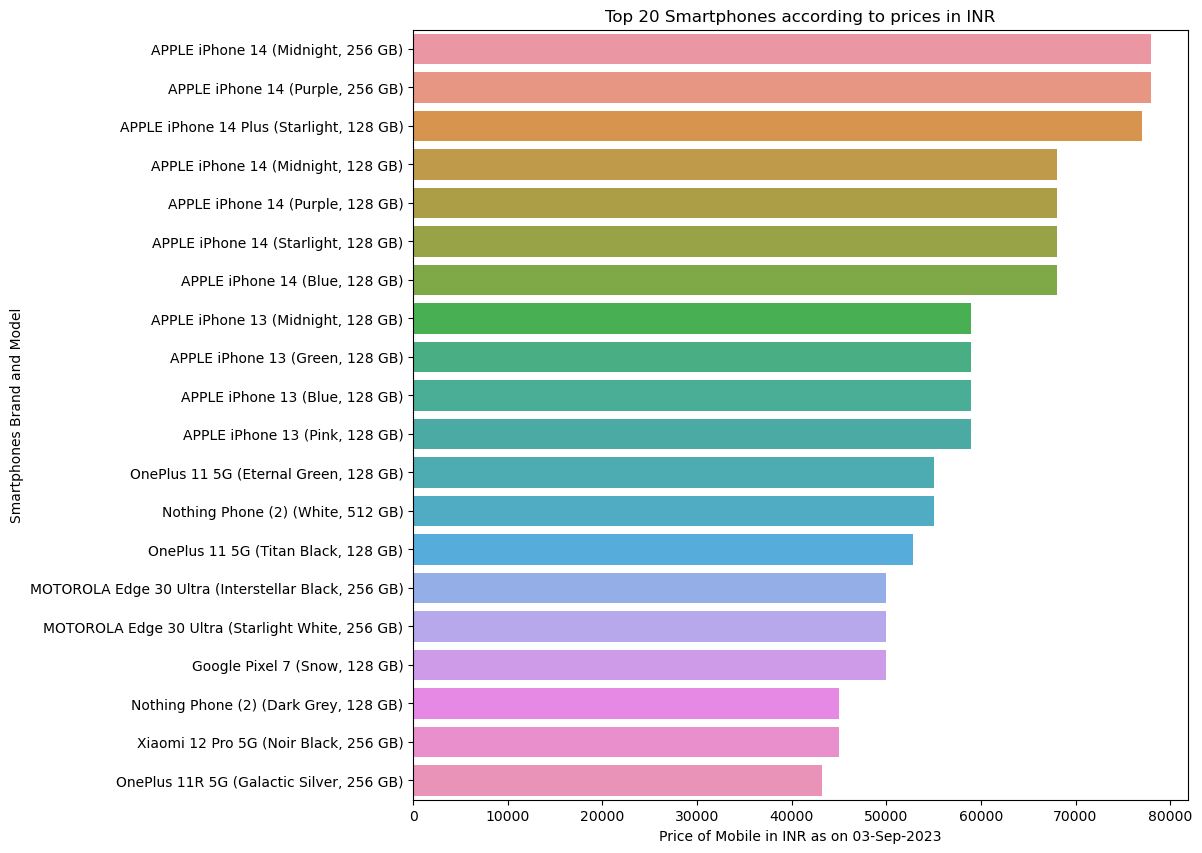

In [47]:
#Visualising the Top 20 mobiles as per the price
from datetime import date
today = date.today()
today_date = today.strftime("%d-%b-%Y")
plt.figure(figsize=(10, 10))
sns.barplot(data=top20Mobile_price, x="Mobile_Price", y="Mobile_Name")
plt.title('Top 20 Smartphones according to prices in INR')
plt.xlabel(f'Price of Mobile in INR as on {today_date}')
plt.ylabel('Smartphones Brand and Model')

In [48]:
#Creating the seperate Data Frame for least 20 mobile accoring to its prices
least20Mobile_price = mobile_spec_columns.nsmallest(20, "Mobile_Price")
least20Mobile_price = least20Mobile_price.reset_index(drop=True)
least20Mobile_price

,Mobile_Name,Mobile_Price,Mobile_Rating_Stars,Mobile_Spec,img_element
0,Lvix L1 310,620,3.3,16 MB RAM | 32 MB ROM4.5 cm (1.77 inch) Displa...,https://rukminim2.flixcart.com/image/312/312/k...
1,Lvix L1 1702,620,3.4,16 MB RAM | 32 MB ROM4.5 cm (1.77 inch) Displa...,https://rukminim2.flixcart.com/image/312/312/l...
2,HOTLINE H310,649,5.0,32 MB RAM | 32 MB ROM4.57 cm (1.8 inch) Displa...,https://rukminim2.flixcart.com/image/312/312/k...
3,HOTLINE H6700,649,3.3,32 MB RAM | 32 MB ROM4.57 cm (1.8 inch) Displa...,https://rukminim2.flixcart.com/image/312/312/x...
4,HOTLINE H312,649,3.4,32 MB RAM | 32 MB ROM4.57 cm (1.8 inch) Displa...,https://rukminim2.flixcart.com/image/312/312/k...
5,HOTLINE H101,649,4.0,32 MB RAM | 32 MB ROM4.5 cm (1.77 inch) Displa...,https://rukminim2.flixcart.com/image/312/312/x...
6,Lvix L1 312,660,4.1,16 MB RAM | 32 MB ROM4.5 cm (1.77 inch) Displa...,https://rukminim2.flixcart.com/image/312/312/k...
7,Snexian GURU 312,663,3.3,32 MB RAM | 32 MB ROM | Expandable Upto 16 GB4...,https://rukminim2.flixcart.com/image/312/312/x...
8,GFive U220+,665,3.5,32 MB RAM | 32 MB ROM4.57 cm (1.8 inch) Displa...,https://rukminim2.flixcart.com/image/312/312/k...
9,Snexian Guru 310,670,3.3,32 MB RAM | 64 MB ROM | Expandable Upto 16 GB4...,https://rukminim2.flixcart.com/image/312/312/k...


Text(0, 0.5, 'Smartphones Brand and Model')

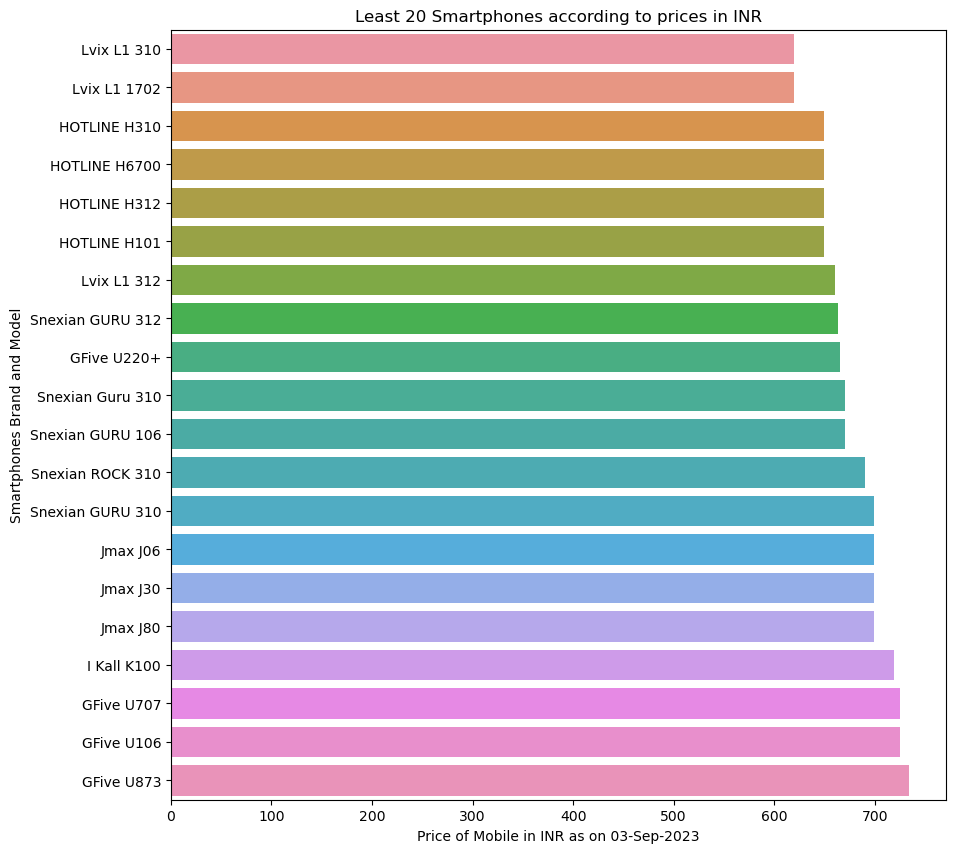

In [49]:
#Visualising the Top 20 mobiles as per the price
plt.figure(figsize=(10, 10))
sns.barplot(data=least20Mobile_price, x="Mobile_Price", y="Mobile_Name")
plt.title('Least 20 Smartphones according to prices in INR')
plt.xlabel(f'Price of Mobile in INR as on {today_date}')
plt.ylabel('Smartphones Brand and Model')

In [50]:
#Top Rated Mobiles between 4.8 to 5.0 ratings
toprated_48_50 = mobile_spec_columns[(mobile_spec_columns["Mobile_Rating_Stars"] >= 4.8) & (mobile_spec_columns["Mobile_Rating_Stars"] <= 5)]

In [51]:
toprated_48_50

,Mobile_Name,Mobile_Price,Mobile_Rating_Stars,Mobile_Spec,img_element
117,HOTLINE H310,649,5.0,32 MB RAM | 32 MB ROM4.57 cm (1.8 inch) Displa...,https://rukminim2.flixcart.com/image/312/312/k...
719,"Nokia C32 (Mint, 64 GB)",8999,5.0,4 GB RAM | 64 GB ROM16.55 cm (6.517 inch) Disp...,https://rukminim2.flixcart.com/image/312/312/x...
982,"REDMI A1+ (Light Blue, 32 GB)",6299,5.0,2 GB RAM | 32 GB ROM | Expandable Upto 512 GB1...,https://rukminim2.flixcart.com/image/312/312/x...
983,"Infinix Hot 11S (Green Wave, 128 GB)",11999,5.0,4 GB RAM | 128 GB ROM | Expandable Upto 256 GB...,https://rukminim2.flixcart.com/image/312/312/k...


In [52]:
print(f"Out of {len(mobile_spec_columns)} Mobiles, {toprated_48_50} got the ratings between 4.8 to 5.0")

Out of 619 Mobiles,                               Mobile_Name  Mobile_Price  Mobile_Rating_Stars  \
117                          HOTLINE H310           649                  5.0   
719               Nokia C32 (Mint, 64 GB)          8999                  5.0   
982         REDMI A1+ (Light Blue, 32 GB)          6299                  5.0   
983  Infinix Hot 11S (Green Wave, 128 GB)         11999                  5.0   

                                           Mobile_Spec  \
117  32 MB RAM | 32 MB ROM4.57 cm (1.8 inch) Displa...   
719  4 GB RAM | 64 GB ROM16.55 cm (6.517 inch) Disp...   
982  2 GB RAM | 32 GB ROM | Expandable Upto 512 GB1...   
983  4 GB RAM | 128 GB ROM | Expandable Upto 256 GB...   

                                           img_element  
117  https://rukminim2.flixcart.com/image/312/312/k...  
719  https://rukminim2.flixcart.com/image/312/312/x...  
982  https://rukminim2.flixcart.com/image/312/312/x...  
983  https://rukminim2.flixcart.com/image/312/312/k...   got

In [53]:
if toprated_48_50.empty:
    print(f"Out of {len(mobile_spec_columns)} Mobiles, Zero(0) mobiles got the ratings between 4.8 to 5.0")
else:
    print(f"Out of {len(mobile_spec_columns)} Mobiles, {len(toprated_48_50)} got the ratings between 4.8 to 5.0")

Out of 619 Mobiles, 4 got the ratings between 4.8 to 5.0


In [54]:
#Top Rated Mobiles between 4.5 to 4.8 ratings
toprated_45_48 = mobile_spec_columns[(mobile_spec_columns["Mobile_Rating_Stars"] >= 4.5) & (mobile_spec_columns["Mobile_Rating_Stars"] <= 4.8)]

In [55]:
if toprated_45_48.empty:
    print(f"Out of {len(mobile_spec_columns)} Mobiles, Zero(0) mobiles got the ratings between 4.5 to 4.8")
else:
    print(f"Out of {len(mobile_spec_columns)} Mobiles, {len(toprated_45_48)} got the ratings between 4.5 to 4.8")

Out of 619 Mobiles, 36 got the ratings between 4.5 to 4.8


In [56]:
toprated_45_48

,Mobile_Name,Mobile_Price,Mobile_Rating_Stars,Mobile_Spec,img_element
10,"realme 11x 5G (Purple Dawn, 128 GB)",15999,4.5,8 GB RAM | 128 GB ROM | Expandable Upto 2 TB17...,https://rukminim2.flixcart.com/image/312/312/x...
11,"realme 11x 5G (Midnight Black, 128 GB)",15999,4.5,8 GB RAM | 128 GB ROM | Expandable Upto 2 TB17...,https://rukminim2.flixcart.com/image/312/312/x...
15,"POCO M6 Pro 5G (Power Black, 64 GB)",10999,4.5,4 GB RAM | 64 GB ROM | Expandable Upto 1 TB17....,https://rukminim2.flixcart.com/image/312/312/x...
23,"POCO M6 Pro 5G (Forest Green, 64 GB)",10999,4.5,4 GB RAM | 64 GB ROM | Expandable Upto 1 TB17....,https://rukminim2.flixcart.com/image/312/312/x...
55,"realme C53 (Champion Gold, 64 GB)",10999,4.5,6 GB RAM | 64 GB ROM | Expandable Upto 2 TB17....,https://rukminim2.flixcart.com/image/312/312/x...
60,"realme C53 (Champion Black, 64 GB)",10999,4.5,6 GB RAM | 64 GB ROM | Expandable Upto 2 TB17....,https://rukminim2.flixcart.com/image/312/312/x...
132,"OPPO A17k (Blue, 64 GB)",9499,4.5,3 GB RAM | 64 GB ROM | Expandable Upto 2 TB16....,https://rukminim2.flixcart.com/image/312/312/x...
136,"APPLE iPhone 14 (Midnight, 128 GB)",67999,4.6,128 GB ROM15.49 cm (6.1 inch) Super Retina XDR...,https://rukminim2.flixcart.com/image/312/312/x...
240,"OnePlus 11R 5G (Sonic Black, 128 GB)",39187,4.5,8 GB RAM | 128 GB ROM17.02 cm (6.7 inch) Displ...,https://rukminim2.flixcart.com/image/312/312/x...
241,"APPLE iPhone 11 (Black, 128 GB)",40999,4.6,128 GB ROM15.49 cm (6.1 inch) Liquid Retina HD...,https://rukminim2.flixcart.com/image/312/312/k...


In [57]:
#Top Rated Mobiles between 4.0 to 4.5 ratings
toprated_40_45 = mobile_spec_columns[(mobile_spec_columns["Mobile_Rating_Stars"] >= 4.0) & (mobile_spec_columns["Mobile_Rating_Stars"] <= 4.5)]
if toprated_40_45.empty:
    print(f"Out of {len(mobile_spec_columns)} Mobiles, Zero(0) mobiles got the ratings between 4.0 to 4.5")
else:
    print(f"Out of {len(mobile_spec_columns)} Mobiles, {len(toprated_40_45)} got the ratings between 4.0 to 4.5")


Out of 619 Mobiles, 474 got the ratings between 4.0 to 4.5


Text(0, 0.5, 'Number of Smartphones')

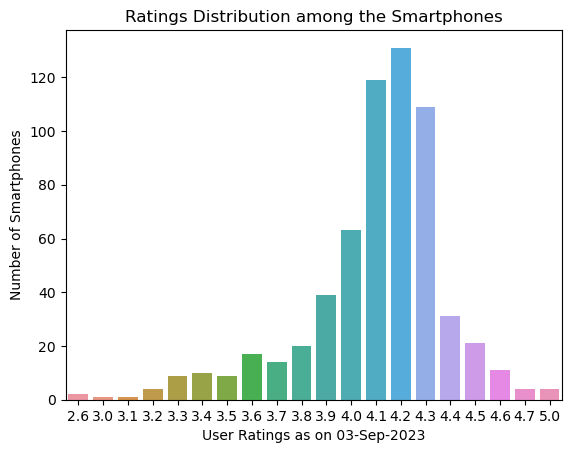

In [58]:
#Visualising the Ratings Distribution among the Smartphones
sns.countplot(data=mobile_spec_columns,x="Mobile_Rating_Stars")
plt.title('Ratings Distribution among the Smartphones')
plt.xlabel(f'User Ratings as on {today_date}')
plt.ylabel('Number of Smartphones')

### End of EDA